## Example of extracting the lever arm and the charging energy from bias triangles and addition lines

Authors: Anne-Marije Zwerver and Pieter Eendebak

More details on non-equilibrium charge stability measurements can be found in https://doi.org/10.1103/RevModPhys.75.1 (section B) and https://doi.org/10.1063/1.3640236

The core functions used in the example are `perpLineIntersect`, `lever_arm`, `E_charging` and `interdot_energy`. Input needed for the code are the non-equilibrium charge stability diagrams of a 1,0-0,1 interdot transition for the lever arm, and a charge stability diagram with the 0-1 and 1-2 charge transitions.

In [1]:
%matplotlib inline
import os, sys
import qcodes
import qtt
import matplotlib.pyplot as plt
import numpy as np

from qcodes import MatPlot
from qtt.data import diffDataset
from qtt.algorithms.bias_triangles import perpLineIntersect, lever_arm, E_charging, interdot_energy

### Load datasets

In [2]:
exampledatadir=os.path.join(qtt.__path__[0],'exampledata','misc')
qcodes.DataSet.default_io = qcodes.DiskIO(exampledatadir)
dataset_anticrossing = qcodes.load_data(os.path.join(exampledatadir, r'Lever_arm_Charging_energy', '14-28-52_qtt_scan2Dfast'))
dataset_la = qcodes.load_data(os.path.join(exampledatadir, r'Lever_arm_Charging_energy', '14-33-26_qtt_scan2Dfast'))
dataset_Ec = qcodes.load_data(os.path.join(exampledatadir, r'Lever_arm_Charging_energy', '10-06-59_qtt_scan2Dfast'))

First, make a double dot and find the (1,0) -- (0,1) anticrossing:

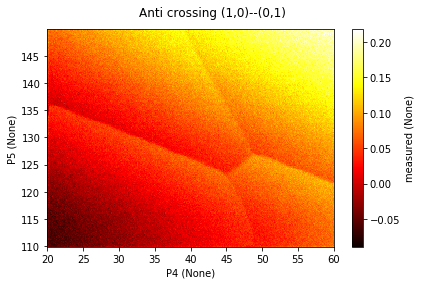

In [3]:
plt.figure(1); plt.clf()
MatPlot([dataset_anticrossing.measured], num = 1)
_=plt.suptitle('Anti crossing (1,0)--(0,1)') 

Then, apply a bias across the Fermi reservoirs (in the example -800 uV) and scan the anti crossing again. This non-equilibrium regime shows "bias triangles", which can be used to extract the gate-to-dot lever arms. More information on these measurements can be found in the references cited in the introduction of this example.

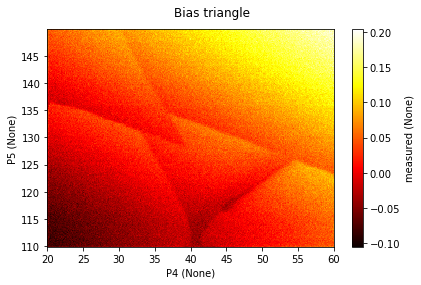

In [4]:
plt.figure(1); plt.clf()
MatPlot([dataset_la.measured], num = 1)
_=plt.suptitle('Bias triangle') 

### Lever arm

The function perpLineIntersect guides you through the process of extracting the lever arm from the bias triangles. To do this, you must include description = 'lever_arm' as input to the function.

The function instructs you to click on 3 points in the figure. Point 1 and 2 along the addition line for the dot of which you want to determine the lever arm, the third point on the triple point where both dot levels and reservoir are aligned. The perpLineIntersect function will return a dictionary containing the coordinates of these three points, the intersection point of a horizontal/vertical line of the third point with the (extended) line through point 1 and 2 and the line length from the third point to the intersection.

It is important to set the vertical input based on the dot for which the lever arm is being measured. vertical = True (False) to measure the lever arm of the gate in vertical (horizontal) axis.

NB: perpLineIntersect makes use of clickable interactive plots. However, the inline plots in this notebook are not interactive, therefore, in this example we provide the function the clicked points as an input. If you want to try and click, restart the notebook and please use '%pylab tk' instead of '%matplotlib inline' and remove the points input from the function call.

Please click three points;
            Point 1: on the addition line for the dot represented on the vertical axis
            Point 2: further on the addition line for the dot represented on the vertical axis
            Point 3: on the triple point at the addition line for the dot represented on the horizontal axis
            where both dot levels are aligned


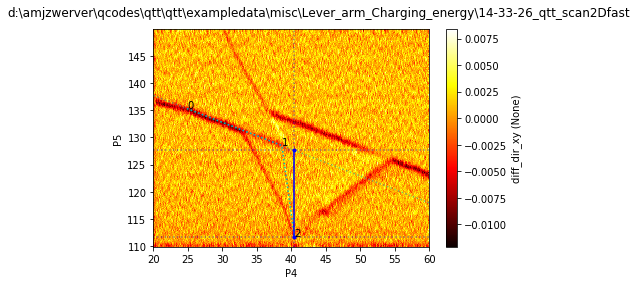

In [5]:
dot = 'P5'

if dot == 'P4':
    vertical = False
elif dot == 'P5':
    vertical = True
else:
    print("Please choose either dot 4 or dot 5")

clicked_pts = np.array([[  24.87913077,   38.63388728,   40.44875099],
       [ 135.28934654,  128.50469446,  111.75508464]])

lev_arm_fit = perpLineIntersect(dataset_la, description = 'lever_arm', vertical = vertical, points = clicked_pts)

Determine the lever arm ($\mu$V/mV) by dividing the applied bias for the bias triangles by the voltage span determined by perpLineIntersect

In [6]:
bias = dataset_la.snapshot()['allgatevalues']['O5'] # bias voltage extracted from the dataset
print(bias)
lev_arm = lever_arm(bias, lev_arm_fit, fig = True)
print('''The lever arm of gate %s to dot %s is %.2f ueV/mV'''%(dot, dot[1], lev_arm))

-800
The lever arm of gate P5 to dot 5 is 50.46 ueV/mV


### Extract addition energy

Once the lever arm is known, the addition energy can be extracted from a charge stability diagram showing 2 addition lines. Again, use the function perpLineIntersect, this time using description = 'E_charging'. The function instructs you to click on the 3 relevant points from which the distance between the 2 addition lines can be measured, and converted to meV using the lever arm.

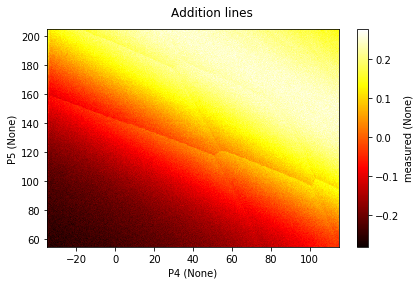

In [14]:
plt.figure(3); plt.clf()
MatPlot([dataset_Ec.measured], num = 3)
ax = plt.gca()
_=plt.suptitle('Addition lines') 

Please click three points;
            Point 1: on the (0, 1) - (0,2) addition line
            Point 2: further on the (0, 1) - (0,2) addition line
            Point 3: on the (0, 0) - (0, 1) addition line 


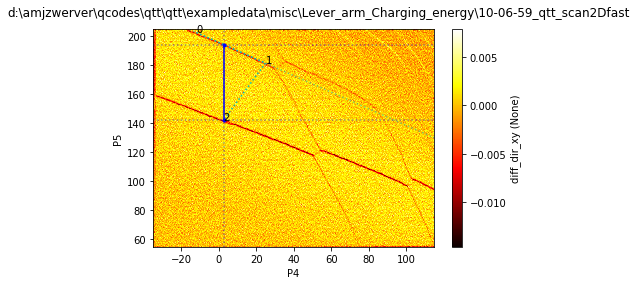

In [8]:
clicked_pts = np.array([[ -11.96239499,   24.89272409,    2.56702695],
        [ 202.62140281,  181.56972616,  142.246783  ]])

Ec_fit = perpLineIntersect(dataset_Ec, description = 'E_charging', vertical = vertical, points = clicked_pts)

In [9]:
E_c = E_charging(lev_arm, results = Ec_fit, fig = True)
print('The charging energy of dot %s is %.2f meV' % (dot[1], E_c/1000))

The charging energy of dot 5 is 2.63 meV


### Extract interdot energy

Once the lever arms of both dots are known, the interdot energy can be extracted from a charge stability diagram showing an anti crossing. Again, use the function perpLineIntersect, this time using description = 'interdot'. The function instructs you to click on the 2 triple points in the anti crossing and a third, random point. It returns the interdot energy in ueV.

Please click on the two triple points and the third point somewhere random in the plot. 
              The argument 'vertical' can be either True or False


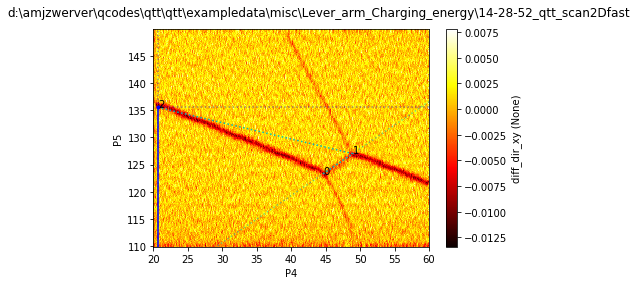

In [10]:
clicked_pts = np.array([[  44.63129935,   48.92612246,   20.66839265],
                        [ 123.31019521,  127.02055182,  135.50136692]])

interdot_fit = perpLineIntersect(dataset_anticrossing, description = 'interdot', vertical = True, points = clicked_pts)

In [16]:
int_energy = interdot_energy(lev_arm_x = 65.69, lev_arm_y = lev_arm, results = interdot_fit)
print('The interdot energy between dots 4 and 5 is %.2f meV' % (int_energy/1000))

The interdot energy between dots 4 and 5 is 0.47 meV
